<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [12]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [10]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Median value of owner-occupied homes

Text(0.5, 1.0, 'Median Value')

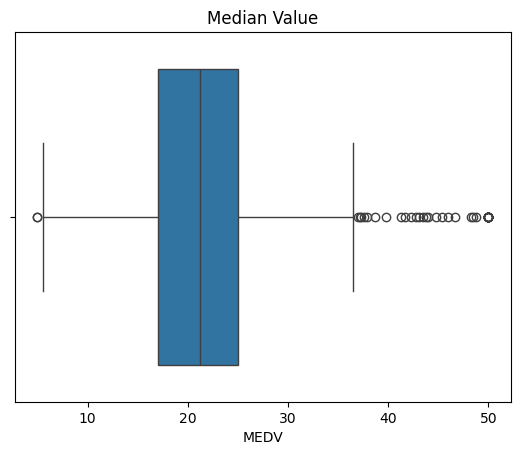

In [61]:
ax = sns.boxplot(x='MEDV', data = boston_df)
pyplot.title("Median Value")

# Charles river variable

Text(0.5, 1.0, 'Charles river variable')

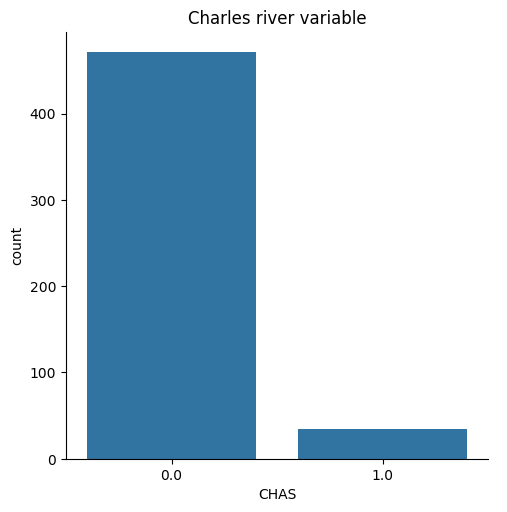

In [62]:
sns.catplot(x='CHAS', kind='count', data = boston_df)
pyplot.title("Charles river variable")

# MEDV variable vs the AGE variable

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

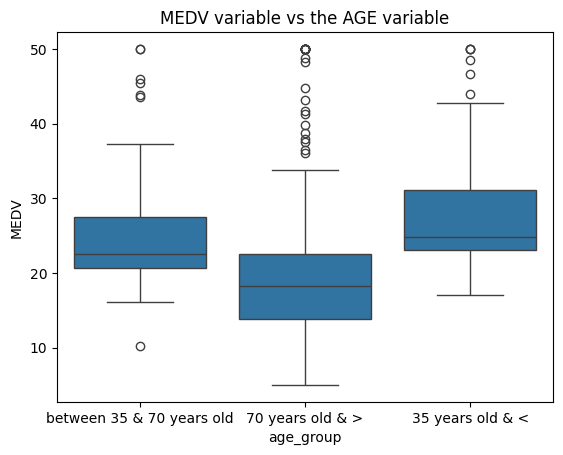

In [63]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years old & <'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 & 70 years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years old & >'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df,)
pyplot.title("MEDV variable vs the AGE variable")

## Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0.5, 1.0, 'NOX/INDUS Relationship Scatterplot')

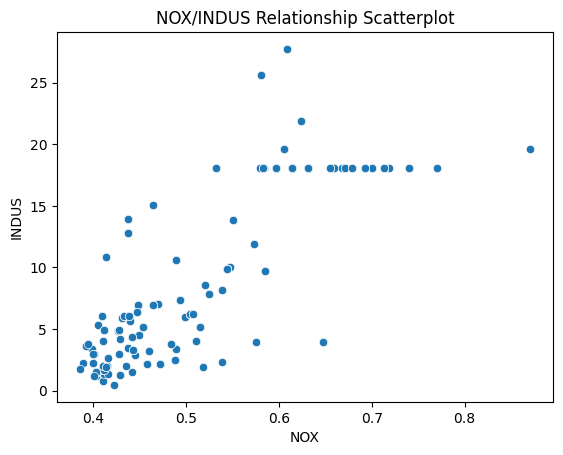

In [64]:
ax = sns.scatterplot(x='NOX', y='INDUS',  data=boston_df)
pyplot.title("NOX/INDUS Relationship Scatterplot")

There appears to be an increased nitric oxide concentration with less business acres per town

# Pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher histogram')

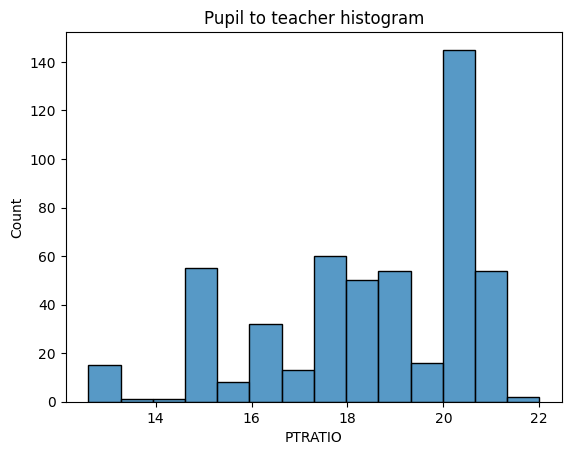

In [65]:
ax = sns.histplot(boston_df['PTRATIO'], kde = False)
pyplot.title("Pupil to teacher histogram")

# Is there a significant difference in median value of houses bounded by the Charles river or not?

  ##### Null Hypothesis H0: There is no significant difference in median value of houses bounded by the Charles river.
  ##### Alternative Hypothesis H1: There is a significant difference in median value of houses bounded by the Charles river.

In [44]:
import scipy.stats

In [45]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [46]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

We reject the null hypothesis because the pvalue is less than 0.05

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

##### Null Hypothesis H0: The three means are equal.
##### Alternative Hypothesis H1: At least one of the means differ.

In [51]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years old & <'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 & 70 years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years old & >'

In [52]:
scipy.stats.levene(boston_df[boston_df['age_group'] == "35 years old & <"]['MEDV'],
                   boston_df[boston_df['age_group'] == "between 35 & 70 years old"]['MEDV'], 
                   boston_df[boston_df['age_group'] == "70 years old & >"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [53]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years old & <']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 & 70 years old']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years old & >']['MEDV']

In [54]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


We reject the null hypothesis because the pvalue is less than 0.05

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

##### Null Hypothesis H0: There is not a correlation.
##### Alternative Hypothesis H1: There is a correlation.

In [55]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Because the pvalue is less than 0.05 we can reject the null hypothesis and conclude there is in fact a relationship between the two

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

##### Null Hypothesis H0: There is not a correlation between DIS and MEDV.
##### Alternative Hypothesis H1: There is a correlation between DIS and MEDV.

In [56]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        08:23:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Because the pvalue is less than 0.05 we can reject the null hypothesis and conclude there is in fact a relationship between the two